In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
import tensorflow as tf
from tensorflow import keras

In [59]:
mnist=keras.datasets.mnist

In [60]:
(X_train_full,Y_train_full),(X_test,Y_test)=mnist.load_data()

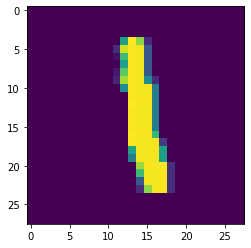

In [61]:
plt.imshow(X_train_full[6])

In [62]:
X_train_n=X_train_full/255

In [63]:
X_test_n=X_test/255

In [64]:
X_valid,X_train=X_train_n[0:6000],X_train_n[6000:]
Y_valid,Y_train=Y_train_full[0:6000],Y_train_full[6000:]

In [65]:
X_test=X_test_n

In [66]:
classes_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [70]:
from keras.utils.vis_utils import plot_model

In [71]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [72]:
weights,biases=model.layers[1].get_weights()

In [73]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [74]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="sgd",metrics=['accuracy'])

In [75]:
model_history=model.fit(X_train,Y_train,epochs=60,validation_data=(X_valid,Y_valid))

Epoch 1/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9293 - val_loss: 0.2254 - val_accuracy: 0.9385
Epoch 4/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1690 - accuracy: 0.9516 - val_loss: 0.1637 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1483 - val_accuracy:

1688/1688 [==============================] - 3s 2ms/step - loss: 0.0091 - accuracy: 0.9993 - val_loss: 0.0799 - val_accuracy: 0.9773
Epoch 58/60
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0778 - val_accuracy: 0.9778
Epoch 59/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 0.0803 - val_accuracy: 0.9775
Epoch 60/60
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.0811 - val_accuracy: 0.9772


In [76]:
model_history.history

{'loss': [0.6606810092926025,
  0.30064913630485535,
  0.24879589676856995,
  0.21510879695415497,
  0.18928807973861694,
  0.1689998060464859,
  0.1521306037902832,
  0.13783971965312958,
  0.1260279268026352,
  0.11572735756635666,
  0.10664938390254974,
  0.09910377115011215,
  0.09173990786075592,
  0.08569195866584778,
  0.08016625046730042,
  0.07516533881425858,
  0.07068926841020584,
  0.06591711938381195,
  0.06243583932518959,
  0.05871589854359627,
  0.05550643056631088,
  0.05245979502797127,
  0.049564287066459656,
  0.04680578038096428,
  0.044284187257289886,
  0.04203980788588524,
  0.039826177060604095,
  0.03780299052596092,
  0.035808488726615906,
  0.03386751934885979,
  0.032171692699193954,
  0.03038603998720646,
  0.02896624058485031,
  0.02739020250737667,
  0.026011168956756592,
  0.0246533565223217,
  0.023709379136562347,
  0.022333387285470963,
  0.0212078969925642,
  0.02022606134414673,
  0.01915363222360611,
  0.01828976906836033,
  0.017407720908522606,


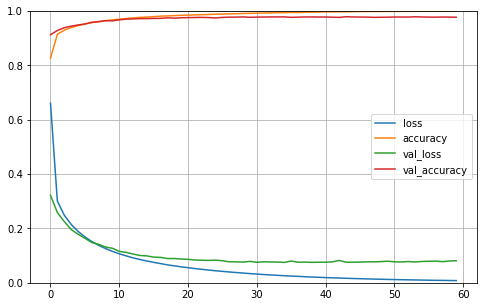

In [77]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [79]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9795


[0.07396024465560913, 0.9794999957084656]

In [80]:
X_new=X_test[:5]

In [81]:
y_proba=model.predict(X_new)

In [82]:
y_proba.round(2)  #2 signifies the number of decimel places we want our answer to be displayed.

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [83]:
y_pred=model.predict(X_new)
classes_x=np.argmax(y_proba,axis=1)

In [84]:
classes_x

array([7, 2, 1, 0, 4], dtype=int64)

In [86]:
np.array(classes_names)[classes_x]

array(['Seven', 'Two', 'One', 'Zero', 'Four'], dtype='<U5')

AxesImage(54,36;334.8x217.44)


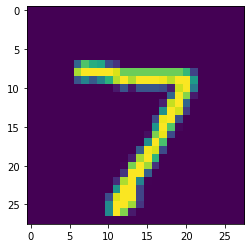

In [89]:
print(plt.imshow(X_test[0]))